#### Pytorch란?
- 토치(torch) 및 카페2(caffe2)를 기반으로 한 텐서플로우와 유사한 딥러닝 라이브러리
- 토치(torch): pytorch의 기원이 되는 토치(torch)라이브러리는 lua로 작성된 오픈소스 머신러닝 라이브러리
- 즉시 사용 가능
- 파이토치는 연구자들에게 천국과 같다.

#### 장점

- 텐서플로우보다 간결해서 쉽게 사용 가능
- 학습 및 추론 속도가 빠르고 다루기 쉽다.
- Define-by-Run 프레임워크
- 많은 논문들이 파이토치로 구현된다.


In [ ]:
# 넘파이로 텐서 만들기(벡터와 행렬 만들기)

import numpy as np

# 1) 1D with numpy
t=np.array([0.,1.,2.,3.,4.,5.,6.])
print(t)


[0. 1. 2. 3. 4. 5. 6.]


In [ ]:
print('t[0] t[1] t[-1] = ',t[0],t[1],t[-1]) #인덱스를 통한 원소 접근

t[0] t[1] t[-1] =  0.0 1.0 6.0


In [ ]:
print('Rank of t: ', t.ndim) # .ndim: 몇 차원인지 출력
print('Shape of t: ', t.shape) # .shape: 크기를 출력
print('Size of t: ', t.size)

Rank of t:  1
Shape of t:  (7,)
Size of t:  7


In [ ]:
t2=np.array([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.],[10.,11.,12.,]])
print(t2)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [ ]:
print('Rank of t:',t2.ndim)
print('Shape of t:',t2.shape)

Rank of t: 2
Shape of t: (4, 3)


In [ ]:
# 파이토치 텐서 선언하기(Pytorch tensor allocation)

import torch

#1) 1d with pytorch

t1=torch.FloatTensor([0.,1.,2.,3.,4.,5.,6.])
print(t1)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [ ]:
print(t1.dim())
print(t1.shape)
print(t1.size())

1
torch.Size([7])
torch.Size([7])


In [ ]:
t2=torch.FloatTensor([[1.,2.,3.],
                      [4.,5.,6.],
                      [7.,8.,9.],
                      [10.,11.,12.]
                      ])
print(t2)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
print(t2.dim())
print(t2.size())

2
torch.Size([4, 3])


In [ ]:
print(t2[:,1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 것만 가져온다.
print(t2[:,1].size()) # 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [ ]:
import torch

In [ ]:
# 스칼라, 벡터, 행렬
# 스칼라(1개의 자료)
# 벡터(2개이상의 스칼라의 모임)
#헹렬(2개이상의 벡터의 모임)

# tensor: 텐서플로우 딥러닝 프레임워크에서 사용되는 데이터 단위
s1=torch.tensor([1])
s2=torch.tensor([2])

print(s1+s2)
print(s1-s2)
print(s1*s2)
print(s1/s2)

print('---------------------------')

print(torch.add(s1,s2))
print(torch.sub(s1,s2))
print(torch.mul(s1,s2))
print(torch.div(s1,s2))

tensor([3])
tensor([-1])
tensor([2])
tensor([0.5000])
---------------------------
tensor([3])
tensor([-1])
tensor([2])
tensor([0.5000])


In [ ]:
#벡터
v1=torch.tensor([1,2])
v2=torch.tensor([2,3])
print(torch.mul(v1,v2))

tensor([2, 6])


In [ ]:
#행렬
a1=torch.tensor([[1,2],[2,3]])
a2=torch.tensor([[2,3],[3,3]])
print(torch.add(a1,a2))

tensor([[3, 5],
        [5, 6]])


In [ ]:
import torch
#############################################
if torch.cuda.is_available():
  DEVICE=torch.device('cuda')
else:
  DEVICE=torch.devie('cpu')

In [ ]:
# ouput은 회귀는 1개, 시그모이드도 0~1사이값으로 출력되며 출력은 1개
# 0은 [1,0] 1은 [0,1]로 원핫인코딩되면 출력은 2개
# 소프트맥스와 같은 다항분류는 출력갯수가 종류별 갯수와 같음
# 즉, 손글씨 같은 0~9까지의 10개의 숫자가 있기때문에 output이 10개
# 만약에 3이 출력이라면 [0,0,0,1,0,0,0,0,0,0]

#(64,1000) * (1000,100) 행렬과 곱셈
import torch
BATCH_SIZE = 64
INPUT_SIZE = 1000 #x변수

HIDDEN_SIZE = 100 #은닉층 노드의 갯수

OUTPUT_SIZE = 10  #10개중에 가장 큰 값이 예측값이 되는 소프트맥스


x = torch.randn(BATCH_SIZE, 
                INPUT_SIZE, 
                device = DEVICE, 
                dtype = torch.float, 
                requires_grad = False)  # 경사하강 유무

y = torch.randn(BATCH_SIZE, 
                OUTPUT_SIZE, 
                device = DEVICE, 
                dtype = torch.float, 
                requires_grad = False)

#첫세팅되는 w
w1 = torch.randn(INPUT_SIZE,
                 HIDDEN_SIZE, 
                device = DEVICE, 
                dtype = torch.float, 
                requires_grad = True)

#갱신하는 w
w2 = torch.randn(HIDDEN_SIZE,
                 OUTPUT_SIZE, 
                device = DEVICE, 
                dtype = torch.float, 
                requires_grad = True)


learning_rate = 1e-6       

for t in range(1, 501):                                        
    y_pred = x.mm(w1).clamp(min = 0).mm(w2)                    

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 0:
        print("Iteration: ", t, "\t", "Loss: ", loss.item()) 
    loss.backward()    

    with torch.no_grad():
      w1-=learning_rate*w1.grad
      w2-=learning_rate*w2.grad

      w1.grad.zero_()
      w2.grad.zero_()



Iteration:  100 	 Loss:  390.9712829589844
Iteration:  200 	 Loss:  0.8836203813552856
Iteration:  300 	 Loss:  0.0032531251199543476
Iteration:  400 	 Loss:  0.0001020643103402108
Iteration:  500 	 Loss:  2.4240354832727462e-05


In [ ]:
####  오류 역전파
# https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html
# -*- coding: utf-8 -*-
import numpy as np

# N(Batch_Size_은 배치 크기이며, D_in(Input_Size)은 입력의 차원입니다;
# H(Hidden_Size)는 은닉층의 차원이며, D_out(out)은 출력 차원입니다.
Batch_Size,Input_Size, Hidden_Size, out = 5,1, 3, 4
np.random.seed(3)
# 무작위의 입력과 출력 데이터를 생성합니다.
x = np.random.randn(Batch_Size,Input_Size)
y = np.random.randn(Batch_Size, out)

x

array([[ 1.78862847],
       [ 0.43650985],
       [ 0.09649747],
       [-1.8634927 ],
       [-0.2773882 ]])

In [ ]:
y

array([[-0.35475898, -0.08274148, -0.62700068, -0.04381817],
       [-0.47721803, -1.31386475,  0.88462238,  0.88131804],
       [ 1.70957306,  0.05003364, -0.40467741, -0.54535995],
       [-1.54647732,  0.98236743, -1.10106763, -1.18504653],
       [-0.2056499 ,  1.48614836,  0.23671627, -1.02378514]])

In [ ]:
#무작위로 가중치를 초기화합니다.
w1=np.random.randn(Input_Size,Hidden_Size)
w2=np.random.randn(Hidden_Size,out)

print(w1)
print(w2)

[[0.79389434 0.16155147 0.74209525]]
[[ 1.39873178  0.16465539 -0.51891056  0.77099191]
 [ 2.25627201 -1.89213495 -1.11073834 -0.57246752]
 [ 0.12546225 -1.27112959  1.94705296  2.12341603]]


In [ ]:
learning_rate = 1e-6
for t in range(1):
    # 순전파 단계: 예측값 y를 계산합니다.
    h = x.dot(w1)
    print(h)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 손실(loss)을 계산하고 출력합니다.
    loss = np.square(y_pred - y).sum()
    #print(t, loss)

    # 손실에 따른 w1, w2의 변화도를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 가중치를 갱신합니다.
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


[[-1.36474023 -0.27764347 -1.27555375]
 [ 1.22764814  0.24975338  1.1474207 ]
 [ 0.42975578  0.08742974  0.40167101]
 [ 0.02055203  0.00418112  0.01920895]
 [-0.22554354 -0.0458847  -0.21080415]]


In [ ]:
## 파이토치에서 실행하는 오류역전파

dtype=torch.float
device=torch.device("cpu")

import torch
N, D_in, H, D_out=64,1000,100,10

#무작위의 입력과 출력 데이터를 생성합니다.
# x=np.random.randn(batch,input)
# =y=np.random.randn(batch,output)

x=torch.randn(N,D_in,device=device,dtype=dtype)
y=torch.randn(N,D_in,device=device,dtype=dtype)


In [ ]:
# optimizer 알고리즘 구현
import torch

N, D_in, H, D_out=64,1000,100,10

x=torch.randn(N,D_in)
y=torch.randn(N,D_out)

model=torch.nn.Sequential(torch.nn.Linear(D_in,H),torch.nn.ReLU(),
                        torch.nn.Linear(H,D_out),
                        )
loss_fn=torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 Optimizer를 정의합니다.
# 여기서는 Adam을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을
# 포함하고 있습니다. Adam 생성자의 첫번째 인자는 어떤 Tensor가 갱신되어야 하는지
# 알려줍니다.

learning_rate=1e-4
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for t in range(500):
  #순전파 단계
  y_pred=model(x)

  #손실을 계산하고 출력
  loss=loss_fn(y_pred,y)
  if t%100==99:
    print(t,loss.item())
  optimizer.zero_grad()

  #역전파 단계: 모델의 매개변수에 대한 손실의 변화도를 계산
  loss.backward()

  #Optimizer의 step 함수를 호출하면 매개변수가 갱신된다.
  optimizer.step()

99 52.36896896362305
199 1.133326768875122
299 0.010898128151893616
399 3.91345820389688e-05
499 3.8299543092534805e-08


### np.array와 plt.imshow()를 이용하여 이미지 출력

- 검정: RGB(0,0,0)
- 파랑: RGB(0,0,255)
- 빨강: RGB(255,0,0)

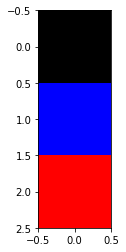

In [ ]:
import matplotlib.pyplot as plt

t=np.array([[[0,0,0]],[[0,0,255]],[[255,0,0]]])
plt.imshow(t)


(2, 3)


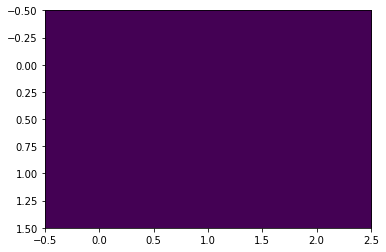

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

x1=np.array([[0,0,0],[0,0,0]])
print(np.shape(x1))


plt.imshow(x1)

(1, 1, 3)


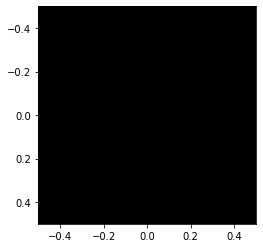

In [ ]:
# 3차원 텐서

x1=[[[0,0,0]]]
print(np.shape(x1))

plt.imshow(x1)

(2, 2, 3)

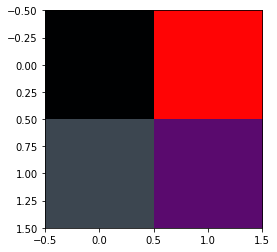

In [ ]:
t=np.array([
           [[0,1,2],
            [255,4,5]],
           [[60,70,80],
            [90,10,110]]
])
plt.imshow(t)

np.shape(t)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  0.   1.   2.]
  [255.   4.   5.]]

 [[ 60.  70.  80.]
  [ 90.  10. 110.]]]


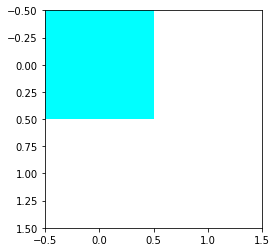

In [ ]:
tmp1=np.zeros((2,2,3))
tmp2=np.array([255,0,0])
tmp3=tmp1+t
plt.imshow(tmp3)
print(tmp3)

(1, 3, 3)


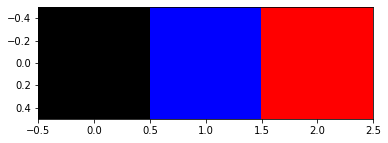

In [ ]:
# 3차원 텐서
x1=[[[0,0,0],[0,0,255],[255,0,0]]]

print(np.shape(x1))
plt.imshow(x1)